# HR-diagram zelfmaken
Binnen de sterrekunde worden veel sterren bestudeerd. Dat zijn er te veel om een voor een af te gaan. Daarom worden vergelijkbare sterren gecatoriceerd. Dat wordt gedaan doormiddel van python. Binnen de python omgeving kun je met veel data tegelijk werken. Zo kun je van duizenden sterren in een keer de afstand berekenen of de kleur bepalen en je kunt al deze data vormgeven door een diagram te maken. Een wel bekend diagram is het HR-diagram (Hertz-Ruzzel). In een HR diagram staat de kleur van de ster op de x-as en de magnitude op de y-as. Uit dit diagram kun je ook de grootte van de ster halen en de levensfase van de ster. In de binas staat ook een HR-diagram. In deze python-notebook maak je zelf een beter HR-diagram. 

# Conpecten
- Je leert over magnitudes, paralax, parsec, kleurenfilters, levensloop van een ster, ...
- Je leert hoe je data kan opvragen van een server, je leert slimme keuzes te maken binnen python, ...

# Leerdoelen
- Je leert hoe je met python en echte data een HR-dragram kan maken
- Je leert informatie op te zoeken over pythonvaardigheden
- Je leert over bovenstaande natuurkundige concepten

# Hulpmiddelen
Jullie hebben vorig jaar al geleerd hoe je kunt modelren in python. Voor deze module heb je nog veel meer kennis nodig van sterrekunde specifieke mogelijkheden in python. Als je hier hulp bij nodig hebt, kun je uiteraard de docent om hulp vragen, maar het is ook toegestaan om AI als chatGTP te gebruiken. 

# Importeren bibliotheken
In deze module heb je de volgende bibliotheken nodig: 
- Numpy voor het verwerken van data
- Matplotlib voor het genereren van diagrammen
- Pandas voor het verwerken van grote data
- Astropy voor het werken met astronomische eenheden, coordianten en contact met de server om data van de Gaia sataliet te verkrijgen

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
from astropy.coordinates import Distance, SkyCoord
from astroquery.gaia import Gaia
import matplotlib.colors as mcolors

# Magnitude

Magnitude in de astronomie is een maat voor de helderheid van een object in het universum. Het systeem is logaritmisch, wat betekent dat een verschil van één magnitude-eenheid een helderheidsverschil van ongeveer 2,5 keer vertegenwoordigt. Ook is het systeem omgekeerd, wat betekent dat een helderder object een lagere magnitude heeft dan een minder helder object.

Er zijn twee soorten magnitudes die vaak worden gebruikt: schijnbare magnitude en absolute magnitude.

- Schijnbare magnitude (m) is een maat voor hoe helder een ster aan de nachtelijke hemel lijkt vanaf de aarde.
- Absolute magnitude (M) is een maat voor de intrinsieke helderheid van een ster, d.w.z. hoe helder het zou zijn als het op een standaardafstand van 10 parsecs (ongeveer 32,6 lichtjaar) van de waarnemer zou zijn.

De absolute magnitude wordt berekend met de formule:

$$ M = m - 5 \log_{10}(d / 10) $$

waarbij $M$ de absolute magnitude is, $m$ de schijnbare magnitude, $d$ de afstand tot het object in parsecs, en $\log_{10}$ de logaritme met basis 10.


In [2]:
# Functie om absolute magnitude te berekenen
def absolute_magnitude(m, d):
    return m - 5 * np.log10(d / 10)

Dit is een Python-functie die de absolute magnitude berekent. Het neemt de schijnbare magnitude (m) en de afstand tot het object in parsecs (d) als invoer en retourneert de berekende absolute magnitude.

De functie gebruikt de formule voor de absolute magnitude die hierboven is beschreven. Het gebruikt de functie np.log10 van de numpy-bibliotheek om de logaritme met basis 10 te berekenen. De formule wordt vervolgens toegepast en het resultaat wordt geretourneerd.

# Hyaden sterrenhoop selecteren

Deze code maakt een object hyades_center dat de coördinaten in de hemel van het centrum van de Hyaden-sterrenhoop voorstelt.

De Hyaden is een open sterrenhoop in het sterrenbeeld Taurus en is het dichtstbijzijnde open cluster aan de aarde. De coördinaten van het centrum van de Hyaden zijn ongeveer 66,75 graden in rechte klimming (RA) en 15,87 graden in declinatie (dec).

De Hyaden-sterrenhoop wordt vaak gebruikt in astronomische studies vanwege een paar belangrijke eigenschappen:

- Nabijheid tot de aarde: De Hyaden is de dichtstbijzijnde open sterrenhoop tot de aarde, op ongeveer 150 lichtjaar afstand. Dit maakt observaties relatief gemakkelijk en zorgt voor een hoge kwaliteit van gegevens.
- Leeftijd en samenstelling: De Hyaden zijn ongeveer 625 miljoen jaar oud en bevatten sterren van verschillende massa's en ontwikkelingsstadia. Dit maakt het een uitstekend laboratorium voor het bestuderen van stellaire evolutie.
- Goed bestudeerd: Vanwege de hierboven genoemde redenen is de Hyaden een van de meest bestudeerde sterrenhopen. Er is een schat aan gegevens beschikbaar, waaronder nauwkeurige afstanden, radiale snelheden, en lidmaatschappen van sterren.
In het kader van een Hertzsprung-Russell (HR) diagram zijn de sterren in een cluster zoals de Hyaden bijzonder nuttig omdat ze allemaal ongeveer dezelfde leeftijd en chemische samenstelling hebben en op dezelfde afstand staan. Dit maakt het gemakkelijker om patronen te herkennen en de eigenschappen van sterren te vergelijken.

Laten we de verschillende delen van de code eens nader bekijken:

- *SkyCoord*: Dit is een klasse in de \emp{astropy.coordinates} module die wordt gebruikt om hemelcoördinaten te vertegenwoordigen. Hemelcoördinaten worden gebruikt om de posities van objecten in de ruimte te beschrijven.
- *ra=... * u.deg, dec=... * u.deg*: Dit zijn de coördinaten in rechte klimming en declinatie van het centrum van de Hyaden, uitgedrukt in graden. De *u.deg* zorgt ervoor dat de getallen worden geïnterpreteerd als graden (de eenheid *deg* is afkomstig van de *astropy.units* module, die hier wordt aangeduid met *u*).
- *frame='icrs'*: Dit geeft het coördinatenstelsel aan waarin de coördinaten worden uitgedrukt. ICRS staat voor International Celestial Reference System, een modern coördinatenstelsel dat veel wordt gebruikt in de astronomie. Het is gebaseerd op de positie van verre quasars en is zeer stabiel en nauwkeurig.
Samengevat maakt deze code dus een SkyCoord-object dat de positie van het centrum van de Hyaden voorstelt in het ICRS-coördinatenstelsel.

In [3]:
# Coördinaten van het centrum van de Hyaden
hyades_center = SkyCoord(ra=66.75 * u.deg, dec=15.87 * u.deg, frame='icrs') # Vul hier de juiste coördinaten in bij ra=... en dec=...

# Data downloaden van de server

Dit stuk code maakt een SQL-query aan om gegevens van de Gaia Early Data Release 3 (Gaia EDR3) te downloaden. De SQL-query wordt gebruikt om specifieke gegevens uit een database te selecteren.

Laten we elk onderdeel van deze SQL-query eens nader bekijken:

- *SELECT phot_g_mean_mag*, *parallax*, *bp_rp*: Dit vertelt de database dat we geïnteresseerd zijn in drie specifieke kolommen: *phot_g_mean_mag* (gemiddelde G-band magnitude), *parallax* (parallax in milliboogseconden), en *bp_rp* (kleurindex, een verschil tussen de magnitude in de blauwe (BP) en rode (RP) photometrische banden van Gaia).
- *FROM gaiaedr3.gaia_source*: Dit geeft aan uit welke tabel de gegevens moeten worden opgehaald. In dit geval wordt de *gaia_source* tabel van de *gaiaedr3* database gebruikt.
De *WHERE*-clausule wordt gebruikt om bepaalde voorwaarden op te leggen aan de gegevens die worden geselecteerd. De voorwaarden hier zijn dat de parallax moet een relatieve fout kleiner dan 10% hebben (*parallax_over_error > 10*), en dat de *phot_g_mean_mag*, *parallax*, en *bp_rp* waarden niet NULL mogen zijn (d.w.z., ze moeten bestaan voor elke geselecteerde ster).
- De *CONTAINS(POINT('ICRS', ra, dec), CIRCLE('ICRS', {hyades_center.ra.deg}, {hyades_center.dec.deg}, 5)) = 1* clausule is een ruimtelijke selectie voorwaarde. Het selecteert sterren waarvan de positie (gegeven door de rechte klimming ra en declinatie dec) ligt binnen een cirkel op de hemel met een straal van 5 graden rond het centrum van de Hyaden (*hyades_center*). Het 'ICRS' geeft aan dat de coördinaten worden uitgedrukt in het International Celestial Reference System.

In het algemeen zal deze query dus sterren selecteren uit de Gaia EDR3 catalogus die binnen 5 graden van het centrum van de Hyaden liggen, en die betrouwbare metingen hebben van de G-band magnitude, parallax, en BP-RP kleurindex.

In [4]:
# Query om Gaia DR3 data te downloaden
query = f"""
SELECT
    phot_g_mean_mag, parallax, bp_rp, ra, dec
FROM
    gaiaedr3.gaia_source
WHERE
    parallax_over_error > 10 AND
    phot_g_mean_mag IS NOT NULL AND
    parallax IS NOT NULL AND
    bp_rp IS NOT NULL AND
    CONTAINS(POINT('ICRS', ra, dec),
             CIRCLE('ICRS', {hyades_center.ra.deg}, {hyades_center.dec.deg}, 5)) = 1
"""

De code hieronder activeerd de *Query* en zal de data gaan downloaden. Dit kan even duren. 

In [5]:
# Download Gaia DR3 data met behulp van astroquery
job = Gaia.launch_job_async(query)
gaia_data = job.get_results()

INFO: Query finished. [astroquery.utils.tap.core]


Laten we even kijken naar de data die gewoanload is. Met de *print()* functie kan worden weergegeven wat er zojuist is gedownload. 

In [6]:
print(gaia_data)

phot_g_mean_mag       parallax      ...         pmra               pmdec       
      mag               mas         ...       mas / yr            mas / yr     
--------------- ------------------- ... ------------------- -------------------
      15.800877   0.806382297436968 ... -2.6015379766632614  -4.872830887439466
      15.629533 0.48253896425735626 ...   2.594943759124962 -2.9376118139632608
      17.612686  2.1624913763849323 ...   17.56365795675162  -6.223877920864317
       15.58414  0.8768783500704336 ...   6.976948545711181  -8.950011104606777
      17.870348  1.3886508857084596 ...  3.8136003130185756  -5.380683327533604
      16.546894  0.7208000244929211 ...   4.498846279643226 -7.2947662013459595
      16.162624  1.1505566158504241 ...  1.4107925515950002 -3.4890633419496866
      15.776878  0.8538783296353444 ... -1.2402350622889022 -10.925084434873602
     15.0546665  2.3159517959352276 ...   41.22207103211443 -2.9554013816320928
      14.319594   3.092882732759959 ... 

# Informatie verduidelijken

De gedownloadde informatie is op het moment niet bruikbaar voor de code. Deze moeten we eerst omzetten. Dat doen we met de *.to_pandas()* functie. Deze zal de data omzetten naar een *Pandas dataframe (df)*. Pandas is een populaire library voor werken met grote data. Je ziet dat er data van meer dan 80 duizend sterren is gedownload. 

In [7]:
# Converteer de data naar een Pandas DataFrame
gaia_df = gaia_data.to_pandas()

Hoe ziet de verwerkte data eruit? Alle rijen hebben een nummer gekregen, daarnaast zijn er drie kolommen. Dat zijn de vijf varabelen waar we in onze *query* om ehbben gevraagd onder het kopje *SELECT*. 

In [8]:
print(gaia_df)

       phot_g_mean_mag  parallax     bp_rp         ra        dec       pmra  \
0            15.800877  0.806382  1.504452  62.282005  16.618684  -2.601538   
1            15.629533  0.482539  1.439171  62.257891  16.619423   2.594944   
2            17.612686  2.162491  2.247086  61.880921  14.506940  17.563658   
3            15.584140  0.876878  1.249573  61.873575  14.505380   6.976949   
4            17.870348  1.388651  2.168056  61.851406  14.506766   3.813600   
...                ...       ...       ...        ...        ...        ...   
86054        15.334063  3.393540  1.910006  66.075875  20.799621   8.776087   
86055        18.946457  3.526461  3.127232  66.108368  20.824458   7.882883   
86056        13.253302  1.568410  1.584668  66.084964  20.829114   4.449430   
86057        15.963863  1.079479  1.492567  66.079166  20.822334  14.073335   
86058        18.178156  4.141563  3.171301  66.090220  20.825858  13.431353   

           pmdec  
0      -4.872831  
1      -2.937

# Beeld maken

Laten we eerst een beeld maken van de sterrenhoop. We hebben erg veel sterren geselecteerd, hoe ziet deze sterrenhoop aan de hemel er daadwerkelijk uit? 
Maak een plot met de *ra* en *dec* op de x- en y-as. Je selecteerd de juiste data door eerst *gaia_df* te typen en aansluiten in vierkante haken de naam van de kolom die je wil selecteren. Bijvoorbeeld: *gaia_df['ra']*

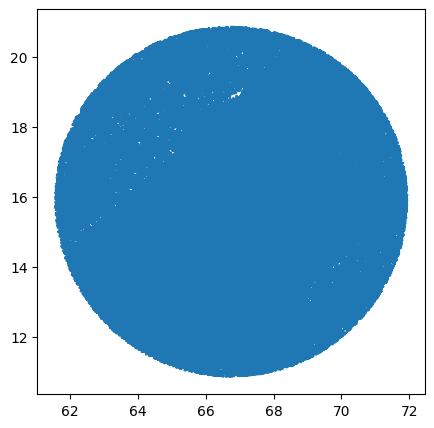

In [9]:
plt.figure(figsize=(5,5))
plt.plot(gaia_df['ra'], gaia_df['dec'])
plt.show()

Wat had je verwacht? Het zijn 80 duizend sterren. het hele figiir staat vol met sterren. Later gaan de de data filtreren om een duidelijker beeld te maken. 

Waarom is het figuur rond?

Antwoord: Bij de Query heb je een centraalpunt geselecteerd en aangegeven dat de geselecteerde sterren binnen 5 graden van het centrum moet liggen. 

# Afstand berekenen

Deze code berekent de afstanden tot sterren met behulp van hun parallax. Parallax is de schijnbare verschuiving van een object tegen een achtergrond wanneer het wordt waargenomen vanuit twee verschillende punten. In astronomie wordt parallax gebruikt om afstanden tot nabijgelegen sterren te meten.

Laten we de code regel voor regel doorlopen:

- *parallax = gaia_df['parallax'].values * u.mas*: Hier wordt de parallaxwaarde voor elke ster opgehaald uit de Gaia dataset. De waarden zijn uitgedrukt in *milliboogseconden (mas (milli arc seconds))*, wat een maateenheid is voor hoekgrootte. De *parallax* is direct gerelateerd aan de afstand van een object: hoe groter de *parallax*, hoe dichter het object.
- *distances = Distance(parallax=parallax, allow_negative=True)*: Dit is waar de daadwerkelijke afstandsberekening gebeurt. De *Distance* functie van de *Astropy bibliotheek* wordt gebruikt om de afstand tot elke ster te berekenen op basis van zijn *parallax*. De parameter *allow_negative=True* betekent dat de functie negatieve afstanden zal toelaten. Dit is meestal te wijten aan meetfouten in de parallax en het betekent niet dat de sterren echt een negatieve afstand hebben.

In [10]:
# Bereken afstanden in parsecs met behulp van Astropy Distance
parallax = gaia_df['parallax'].values * u.mas
distances = Distance(parallax=parallax, allow_negative=True)


# Absolute magnitude berekenen

Deze regel van code berekent de absolute magnitude van sterren op basis van hun schijnbare magnitude en afstand.

De functie *absolute_magnitude()* (eerder gedefinieerd) wordt toegepast op de *schijnbare magnitude (gaia_df['phot_g_mean_mag'])* en de afstand van de sterren *(distances.pc)*. De schijnbare magnitude is de helderheid van een ster zoals waargenomen vanaf de aarde, terwijl de absolute magnitude de helderheid van een ster is zoals die zou worden waargenomen vanaf een afstand van 10 parsec.

In [11]:

# Bereken absolute magnitudes
abs_magnitudes = absolute_magnitude(gaia_df['phot_g_mean_mag'], distances.pc)

# HR-diagram maken (1)

Maak een sprijdingsdiagram met op de horizontale as de kleur van de ster en op de verticale as de absolute magnitude van de ster. *'bp_rp'* is de kleur, deze zit in de *gaia_df* data. Geef het diagram labels en een titel. 

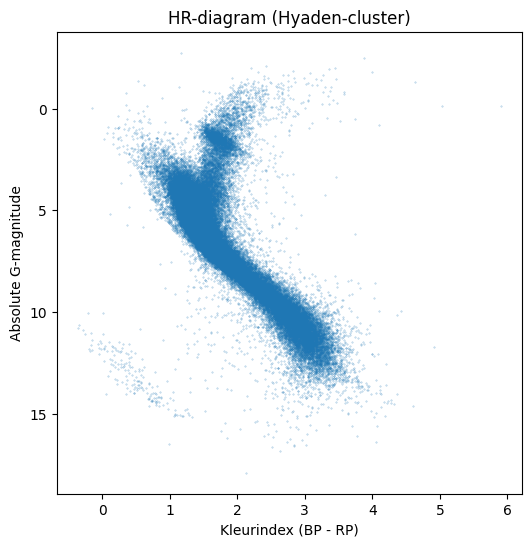

In [18]:
# Create the HR-diagram with colored stars
plt.figure(figsize=(6, 6))
plt.scatter(gaia_df['bp_rp'], abs_magnitudes, s=0.1, alpha=0.5)
plt.gca().invert_yaxis()  # Helderste sterren bovenaan
plt.xlabel('Kleurindex (BP - RP)')
plt.ylabel('Absolute G-magnitude')
plt.title('HR-diagram (Hyaden-cluster)')
plt.show()

# Aanpassen
Als je het diagram vergelijkt met de binas, lijkt het plaatje naar links geschoven. Dat komt omdat er in deze data ook sterren zijn met een kleur tot aan '6'. We gaan het diagram bijsnijden soor een selectie te maken van de data. 

Vul hieronder bij het xlimiet de maximale kleur in die je in het diagram zichtbaar wil hebben. 

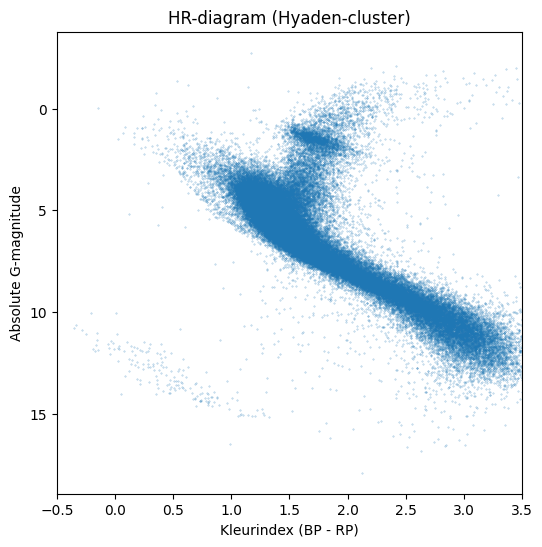

In [21]:
# Create the HR-diagram with colored stars
plt.figure(figsize=(6, 6))
plt.scatter(gaia_df['bp_rp'], abs_magnitudes, s=0.1, alpha=0.5)
plt.gca().invert_yaxis()  # Helderste sterren bovenaan
plt.xlabel('Kleurindex (BP - RP)')
plt.ylabel('Absolute G-magnitude')
plt.title('HR-diagram (Hyaden-cluster)')
plt.xlim(-0.5, 3.5)
plt.show()

In [41]:

# Normalize 'bp_rp' values to the range [0, 1] for color mapping
bp_rp_norm = (gaia_df['bp_rp'] - gaia_df['bp_rp'].min()) / (3.5 - gaia_df['bp_rp'].min())


In [42]:
# Create a color map from blue to red
cmap = mcolors.LinearSegmentedColormap.from_list("blue_to_red", ["blue", "red"])

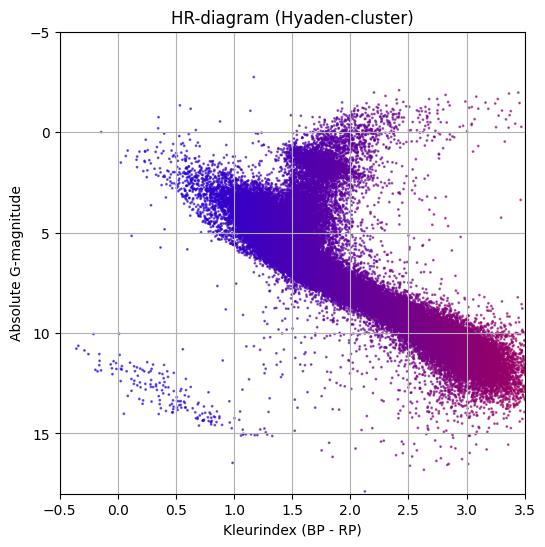

In [48]:
# Create the HR-diagram with colored stars
fig, ax = plt.subplots(figsize=(6, 6))
scatter = ax.scatter(gaia_df['bp_rp'], abs_magnitudes, s=1, c=bp_rp_norm, cmap=cmap, alpha=0.6)
 
ax.invert_yaxis()  # Helderste sterren bovenaan
ax.set_xlabel('Kleurindex (BP - RP)')
ax.set_ylabel('Absolute G-magnitude')
ax.set_title('HR-diagram (Hyaden-cluster)')
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(18, -5)
ax.grid()

plt.show()